In [44]:
import csv
import pickle
import datetime

In [45]:
from statsmodels.compat.pandas import sort_values
from statsmodels.graphics import utils
from statsmodels.tsa.stattools import acf, pacf


In [46]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png','retina'}

In [47]:
data = pd.read_csv('data/data.csv')
data=data.iloc[:,1:]

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (6,7,8,10,12,13,14,15,18,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
pivot_df.replace(0, np.nan).iloc[:-2].dropna(axis = 1)

In [48]:
new_order =  ['date', 'units', 'item_nbr', 'store_nbr','station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC' ]

In [49]:
data = data[new_order]

In [50]:
data.units = data.units.astype(int)

In [51]:
def fulldf(df):
    
    df.snowfall = df.snowfall.replace(["T","  T"],0.05)
    df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
    df.depart = pd.to_numeric(df.depart, errors='coerce')
    
    df = type_change_numeric(df,['store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',\
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', \
    'sealevel', 'avgspeed', 'resultspeed', 'resultdir'])
    df['date'] = pd.to_datetime(df['date'])
    df["week_day_name"] = df['date'].dt.weekday_name
    df["day_of_year"] = df['date'].dt.dayofyear
    df["year"] = df['date'].dt.year
    
    
    
    for idx in range(5, 8):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)

    for idx in range(16, 23):
        df.iloc[:,idx].fillna(df.groupby(["day_of_year","store_nbr"])[df.columns[idx]].\
                              transform('mean'), inplace=True)
    add_depart1(df)
    
    return df

# for column in item37.columns:
#     item37[column].interpolate()


In [52]:
def itemdf(df, nbr):
    item_nbr = df[df.item_nbr == nbr]
    for idx in range(5, 8):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    
    for idx in range(16, 23):
        item_nbr.iloc[:,idx].fillna(item_nbr.groupby(["day_of_year","store_nbr"])[item_nbr.columns[idx]].\
                          transform('mean'), inplace=True)
    add_depart1(item_nbr)
    
    return item_nbr
    

In [53]:
def type_change_numeric(df, ls = []): 
    #ls에 있는 column name은 numeric형으로 바꾸지 않는다.
    cols = df.columns
    for i in cols:
        if i in ls:
            #df = df.replace(["M",None], '')
            df.snowfall = df.snowfall.replace(["T","  T"],0.05)
            df.preciptotal = df.preciptotal.replace(["T","  T"],0.005)
            df[i] = pd.to_numeric(df[i], errors='coerce')
        
    return df

#예시

# data = type_change_numeric(data,[ 'store_nbr', 'item_nbr', 'units', 'station_nbr', 'tmax', 'tmin',
#        'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
#        'avgspeed', 'resultspeed', 'resultdir' ])

In [54]:
def add_depart1(x):
    x.depart.fillna(x.tavg - x.groupby(["day_of_year","store_nbr"])["tavg"].transform('mean'),inplace = True)
    x.depart = x.depart.round(2)
    return x.sort_values(["store_nbr","date","item_nbr"])

In [21]:
train = pd.concat([X_train, y_train] ,axis = 1)

In [22]:
train = train.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [23]:
train.head()

,date,units,item_nbr,store_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,SQ,FZ,MI,PR,BC,BL,VC,week_day_name,day_of_year,units
0,2012-01-01,2,28,1,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,2
1,2012-01-01,0,40,1,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,0
2,2012-01-01,0,47,1,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,0
3,2012-01-01,1,51,1,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,1
4,2012-01-01,0,93,1,1,52.0,31.0,42.0,11.67,36.0,...,False,True,False,False,False,False,False,Sunday,1,0


In [77]:
data37_sum.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-10-22', '2014-10-23', '2014-10-24', '2014-10-25',
               '2014-10-26', '2014-10-27', '2014-10-28', '2014-10-29',
               '2014-10-30', '2014-10-31'],
              dtype='datetime64[ns]', name='date', length=1034, freq=None)

In [74]:
x_test.head()

,date
0,2012-01-01
1,2012-01-01
2,2012-01-01
3,2012-01-01
4,2012-01-01


In [ ]:
### 시계열 보기

In [55]:
data = fulldf(data)

In [193]:
data37 = data[data.item_nbr in [37]]
#data37 = data37[data37.store_nbr == 10]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [57]:
data37 = data37.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [59]:
data37_sum = data37.groupby('date')['units'].sum()

In [60]:
data37_sum.isnull().any()

False

In [61]:
data_log = pd.DataFrame(data37_sum)

In [62]:
data_log.units = data_log.units.apply(lambda x: np.log(x + 1))

In [63]:
data_log.isnull().any()

units    False
dtype: bool

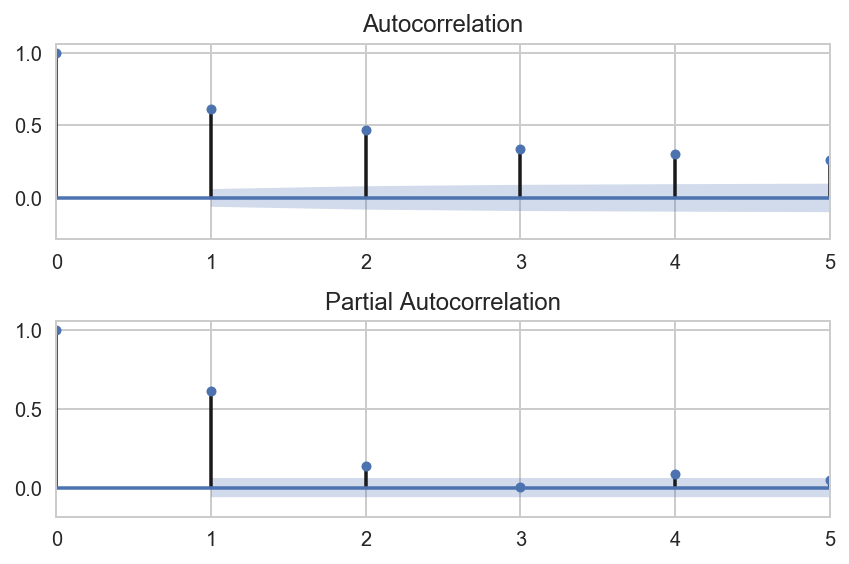

In [64]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(data_log, ax=ax1)
plt.xlim(0,5)
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(data_log, ax=ax2)
plt.xlim(0,5)
plt.tight_layout()
plt.show()

In [65]:
m = sm.tsa.ARMA(data_log, (1, 1))
r = m.fit()
print(r.summary())

                              ARMA Model Results                              
Dep. Variable:                  units   No. Observations:                 1034
Model:                     ARMA(1, 1)   Log Likelihood                -413.784
Method:                       css-mle   S.D. of innovations              0.361
Date:                Thu, 05 Jul 2018   AIC                            835.569
Time:                        14:17:02   BIC                            855.333
Sample:                    01-01-2012   HQIC                           843.069
                         - 10-31-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7234      0.036    132.368      0.000       4.653       4.793
ar.L1.units     0.7629      0.034     22.761      0.000       0.697       0.829
ma.L1.units    -0.2441      0.052     -4.686    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [86]:
y_hat = r.predict()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [67]:
m2 = sm.tsa.ARMA(data_log, (3, 1))
r2 = m2.fit()
print(r2.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                  units   No. Observations:                 1034
Model:                     ARMA(3, 1)   Log Likelihood                -404.763
Method:                       css-mle   S.D. of innovations              0.358
Date:                Thu, 05 Jul 2018   AIC                            821.527
Time:                        14:17:28   BIC                            851.174
Sample:                    01-01-2012   HQIC                           832.776
                         - 10-31-2014                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7004      0.148     31.805      0.000       4.411       4.990
ar.L1.units     1.4898      0.031     48.775      0.000       1.430       1.550
ar.L2.units    -0.3851      0.052     -7.386    

In [89]:
len(data) , len(y_hat), len(item37)

(262206, 1034, 6204)

In [155]:
y_hat.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2014-10-22', '2014-10-23', '2014-10-24', '2014-10-25',
               '2014-10-26', '2014-10-27', '2014-10-28', '2014-10-29',
               '2014-10-30', '2014-10-31'],
              dtype='datetime64[ns]', name='date', length=1034, freq=None)

In [149]:
y_hat.coulmns =['y_hat', data]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [159]:
y_hat.iloc[:,-1 ]

date
2012-01-01    4.723438
2012-01-02    5.061074
2012-01-03    5.176407
2012-01-04    5.145104
2012-01-05    5.012077
2012-01-06    5.048873
2012-01-07    5.066245
2012-01-08    5.241455
2012-01-09    5.298012
2012-01-10    5.113009
2012-01-11    5.032460
2012-01-12    4.919434
2012-01-13    5.029067
2012-01-14    5.053020
2012-01-15    5.181348
2012-01-16    5.061209
2012-01-17    5.104122
2012-01-18    4.874914
2012-01-19    4.793646
2012-01-20    4.790816
2012-01-21    4.853083
2012-01-22    4.969004
2012-01-23    5.071132
2012-01-24    4.709322
2012-01-25    4.688867
2012-01-26    4.756801
2012-01-27    4.643622
2012-01-28    4.778703
2012-01-29    4.889363
2012-01-30    4.974800
                ...   
2014-10-02    4.088335
2014-10-03    4.018569
2014-10-04    4.495166
2014-10-05    4.734418
2014-10-06    4.828077
2014-10-07    4.847141
2014-10-08    4.702558
2014-10-09    4.608064
2014-10-10    4.678624
2014-10-11    4.301842
2014-10-12    4.366668
2014-10-13    4.537340
2014-1

In [160]:
y2 = pd.DataFrame(y_hat.iloc[:,-1])

In [165]:
y2 = y2.head().reset_index()

In [88]:
item37 = data[data.item_nbr == 37]

In [177]:
ex =pd.merge(item37, y2 , how = 'inner', on = 'date')

In [178]:
ex.head()

,date,units,item_nbr,store_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,FZ,MI,PR,BC,BL,VC,week_day_name,day_of_year,year,data
0,2012-01-01,16,37,5,12,72.0,48.0,60.0,0.00,54.0,...,False,False,False,False,False,False,Sunday,1,2012,4.723438
1,2012-01-01,32,37,10,12,72.0,48.0,60.0,0.00,54.0,...,False,False,False,False,False,False,Sunday,1,2012,4.723438
2,2012-01-01,17,37,18,17,56.0,38.0,47.0,8.67,23.0,...,False,False,False,False,False,False,Sunday,1,2012,4.723438
3,2012-01-01,28,37,12,11,72.0,48.0,60.0,7.00,54.0,...,False,False,False,False,False,False,Sunday,1,2012,4.723438
4,2012-01-01,16,37,43,11,72.0,48.0,60.0,7.00,54.0,...,False,False,False,False,False,False,Sunday,1,2012,4.723438


In [179]:
ex.isnull().any()

date             False
units            False
item_nbr         False
store_nbr        False
station_nbr      False
tmax             False
tmin             False
tavg             False
depart           False
dewpoint         False
wetbulb          False
heat             False
cool             False
sunrise           True
sunset            True
snowfall         False
preciptotal      False
stnpressure      False
sealevel         False
avgspeed         False
resultspeed      False
resultdir        False
TS               False
GR               False
RA               False
DZ               False
SN               False
SG               False
GS               False
PL               False
FG+              False
FG               False
BR               False
UP               False
HZ               False
FU               False
DU               False
SQ               False
FZ               False
MI               False
PR               False
BC               False
BL               False
VC         

In [ ]:
item37.head()

In [37]:
X_test = fulldf(X_testm)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [ ]:
item37 = item37.sort_values(by=['date', 'store_nbr', 'item_nbr']).reset_index(drop= True)

In [ ]:
item37.tmax.fillna(item37.groupby(["day_of_year","store_nbr"])['tmax'].transform('mean'), inplace=True) 

In [ ]:
item37 = item37[item37.tmax.isnull() == False]
item37 = item37[item37.tmin.isnull() == False]
item37 = item37[item37.dewpoint.isnull() == False]
item37 = item37[item37.wetbulb.isnull() == False]
item37 = item37[item37.preciptotal.isnull() == False]

In [ ]:
item37.isnull().any()

In [ ]:
data.snowfall = data.snowfall.replace(["T","  T"],0.05)
data.preciptotal = data.preciptotal.replace(["T","  T"],0.005)
data.depart = pd.to_numeric(data.depart, errors='coerce')



In [ ]:
data['date'] = pd.to_datetime(data['date'])
#data['sunrise'] = pd.to_datetime(data['sunrise'], format='%H%M' , errors='coerce')
#data['sunset'] = pd.to_datetime(data['sunset'], format='%H%M' , errors='coerce')
#X_testm['date'] = pd.to_datetime(X_testm['date'] , errors='coerce')
#X_testm['sunrise'] = pd.to_datetime(X_testm['sunrise'], format='%H%M' , errors='coerce')
#X_testm['sunset'] = pd.to_datetime(X_testm['sunset'], format='%H%M' , errors='coerce')

In [ ]:
data["week_day_name"] = data.date.dt.weekday_name
data["day_of_year"] = data.date.dt.dayofyear
data["year"] = data.date.dt.year

In [ ]:
#data.tmax.fillna(data.groupby(["day_of_year","store_nbr"])['tmax'].transform('mean'), inplace=True)
data = data.replace(["M",None], '')

In [ ]:
for idx in range(5, 8):
    item37.iloc[:,idx].fillna(item37.groupby(["day_of_year","store_nbr"])[item37.columns[idx]].\
                              transform('mean'), inplace=True)

In [ ]:
for idx in range(16, 23):
    item37.iloc[:,idx].fillna(item37.groupby(["day_of_year","store_nbr"])[item37.columns[idx]].\
                              transform('mean'), inplace=True)

In [180]:
ex['weekend'] = False
ex.weekend[ex['week_day_name'] == 'Sunday'] = True
ex.weekend[ex['week_day_name'] == 'Saturday'] = True
ex.weekend[ex['week_day_name'] == 'Friday'] = True

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [181]:
ex.head()

,date,units,item_nbr,store_nbr,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,MI,PR,BC,BL,VC,week_day_name,day_of_year,year,data,weekend
0,2012-01-01,16,37,5,12,72.0,48.0,60.0,0.00,54.0,...,False,False,False,False,False,Sunday,1,2012,4.723438,True
1,2012-01-01,32,37,10,12,72.0,48.0,60.0,0.00,54.0,...,False,False,False,False,False,Sunday,1,2012,4.723438,True
2,2012-01-01,17,37,18,17,56.0,38.0,47.0,8.67,23.0,...,False,False,False,False,False,Sunday,1,2012,4.723438,True
3,2012-01-01,28,37,12,11,72.0,48.0,60.0,7.00,54.0,...,False,False,False,False,False,Sunday,1,2012,4.723438,True
4,2012-01-01,16,37,43,11,72.0,48.0,60.0,7.00,54.0,...,False,False,False,False,False,Sunday,1,2012,4.723438,True


In [ ]:
item37['reldate'] = 0
item37.reldate[ item37.date.dt.year == 2012] = item37.date.dt.dayofyear
item37.reldate[ item37.date.dt.year != 2012] = item37.date.dt.dayofyear + (item37.date.dt.year- 2012)*365 + 1

In [ ]:
item37.isnull().any()

In [ ]:
item37_df.head()

In [182]:
ex.columns

Index(['date', 'units', 'item_nbr', 'store_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG+', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'week_day_name', 'day_of_year', 'year',
       'data', 'weekend'],
      dtype='object')

In [183]:
ex.columns =['date', 'units', 'item_nbr', 'store_nbr', 'station_nbr', 'tmax', 'tmin',
       'tavg', 'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise',
       'sunset', 'snowfall', 'preciptotal', 'stnpressure', 'sealevel',
       'avgspeed', 'resultspeed', 'resultdir', 'TS', 'GR', 'RA', 'DZ', 'SN',
       'SG', 'GS', 'PL', 'FG2', 'FG', 'BR', 'UP', 'HZ', 'FU', 'DU', 'SQ', 'FZ',
       'MI', 'PR', 'BC', 'BL', 'VC', 'week_day_name', 'day_of_year', 'year',
       'y_hat', 'weekend']

#### OLS

In [184]:
model = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed)   + C(weekend) + 0" , data = ex)#model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

result = model.fit()


In [186]:
print(result.summury)

AttributeError: 'OLSResults' object has no attribute 'summury'

In [ ]:
item37['logunits'] = item37.units.apply(lambda X: np.log(X) + 1)

In [ ]:
item37.head()

In [ ]:
print(result1.summary())

In [ ]:
model = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed)   + C(weekend) + 0" , data = item37)
model = sm.OLS.from_formula("units ~  date + store_nbr + tmax  + tavg + depart + dewpoint + wetbulb + snowfall + preciptotal + stnpressure + sealevel + avgspeed + resultspeed + resultdir + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37_df)

result1 = model.fit()
print(result1.summary())

In [190]:
model = sm.OLS.from_formula("I(np.log(units +1)) ~  C(store_nbr) + C(FG2) + C(FG) + C(FZ) + scale(y_hat) + 0" , data = ex)

result = model.fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     I(np.log(units + 1))   R-squared:                       0.844
Model:                              OLS   Adj. R-squared:                  0.794
Method:                   Least Squares   F-statistic:                     16.98
Date:                  Thu, 05 Jul 2018   Prob (F-statistic):           1.59e-07
Time:                          15:29:47   Log-Likelihood:                 4.0425
No. Observations:                    30   AIC:                             7.915
Df Residuals:                        22   BIC:                             19.12
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(store_nbr)[5]     

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [192]:
model2 = sm.OLS.from_formula("I(np.log(units +1)) ~  C(store_nbr) + C(FG2) + C(FG) + y_hat + 0" , data = ex)

result2 = model2.fit()
print(result2.summary())

                             OLS Regression Results                             
Dep. Variable:     I(np.log(units + 1))   R-squared:                       0.844
Model:                              OLS   Adj. R-squared:                  0.794
Method:                   Least Squares   F-statistic:                     16.98
Date:                  Thu, 05 Jul 2018   Prob (F-statistic):           1.59e-07
Time:                          15:31:24   Log-Likelihood:                 4.0425
No. Observations:                    30   AIC:                             7.915
Df Residuals:                        22   BIC:                             19.12
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
C(store_nbr)[5]     

In [ ]:
pickle.dump( item37, open( "item37.p", "wb" ) )

In [ ]:
model = sm.OLS.from_formula("units ~  C(store_nbr) + scale(tmax) + scale(tmin) + scale(tavg) + scale(depart) + scale(dewpoint) + scale(wetbulb) + scale(preciptotal) + scale(stnpressure) + scale(sealevel) + scale(avgspeed) + scale(resultspeed) + C(TS) + C(GR) + C(RA) + C(DZ) + C(SN) + C(SG) + C(GS) + C(PL) + C(FG2) + C(FG) + C(BR) + C(UP) + C(HZ) + C(FU) + C(DU) + C(SQ) + C(FZ) + C(MI) + C(PR) + C(BC) + C(BL) + C(weekend) + 0" , data = item37)


result = model.fit()
print(result.summary())